### Objecive

The goal is to create model(s) to predict building energy consumption. The dataset consists of building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. The dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab)

### Data Description
The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. 

The eventual objective is to predict the Site EUI for each row as a function of the building features and the weather data for the location of the building. Your task for this asignment is to perform data processing, EDA and necessary feature transformation that would set you up for prediction.


### Data Dictionary

**id**: building id

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

#### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

Source: WiDS Datathon 2022

In [3]:
import pandas as pd
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape


(75757, 64)

In [5]:
df.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

Since there are many null values, we won't eliminate them. We will try to compute values for them.

In [6]:
cdf = df.drop_duplicates()
cdf.shape

(75757, 64)

In [7]:
cdf.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [8]:
sum(df['Year_Factor'].isnull()==True)

0

In [9]:
from scipy import stats

most_freq_year, count = stats.mode(df['Year_Factor'])

year_mode = int(most_freq_year) # which year factor occurs most frequently in the dataset
print(year_mode)

6


Compute the summary statistics¶

In [10]:

cdf.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = cdf.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

NameError: name 'cdf' is not defined

The year_factor 6 is the most commonly occuring ones.

(array([  234.,  1747.,  2443., 27374., 31422.,   578.,  8188.,  1199.,
         2523.,    49.]),
 array([-19. , -12.2,  -5.4,   1.4,   8.2,  15. ,  21.8,  28.6,  35.4,
         42.2,  49. ]),
 <BarContainer object of 10 artists>)

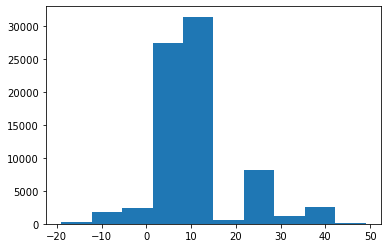

In [12]:
import matplotlib.pyplot as plt
plt.hist(cdf['january_min_temp'])

The histogram is symmetric at 10F.

(array([  232.,   384.,  4720., 27357., 31052.,    54.,  7530.,  3199.,
         1129.,   100.]),
 array([10.80645161, 16.2016129 , 21.59677419, 26.99193548, 32.38709677,
        37.78225807, 43.17741936, 48.57258065, 53.96774194, 59.36290323,
        64.75806452]),
 <BarContainer object of 10 artists>)

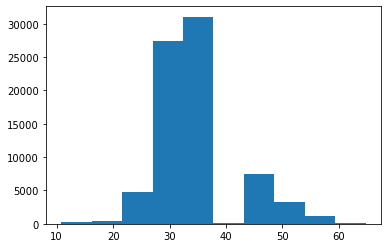

In [14]:
plt.hist(cdf['january_avg_temp'])

The histogram is not symmetric.

(array([ 1828.,  3224.,  8850., 11470.,  2711.,   323.,     0.,     0.,
         1385.,   170.]),
 array([ 12. ,  41.9,  71.8, 101.7, 131.6, 161.5, 191.4, 221.3, 251.2,
        281.1, 311. ]),
 <BarContainer object of 10 artists>)

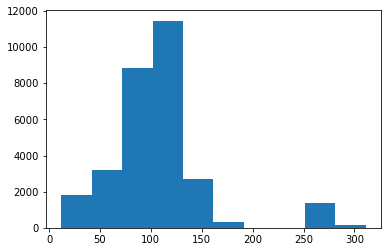

In [15]:
plt.hist(cdf['days_with_fog'])

It looks like histogram is some what symmetric at 100.

<AxesSubplot:>

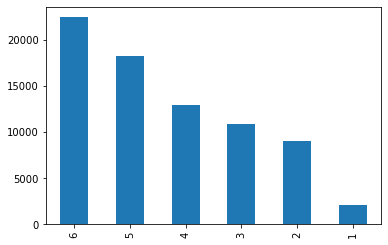

In [17]:
#Bar plot dipicting the frequency for each year_factor
df.Year_Factor.value_counts().plot.bar()


<AxesSubplot:>

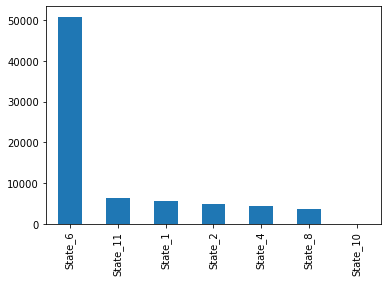

In [18]:
#Bar plot dipicting the frequency for each state_factor

df.State_Factor.value_counts().plot.bar()


We can say that STate_6 has the maximum frequecy.

In [19]:

group_by_year = df.groupby(['State_Factor'])
group_by_year.size()


State_Factor
State_1      5618
State_10       15
State_11     6412
State_2      4871
State_4      4300
State_6     50840
State_8      3701
dtype: int64

<AxesSubplot:>

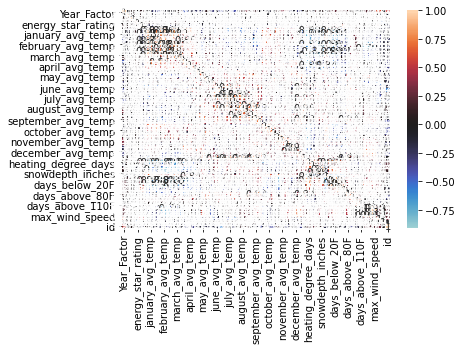

In [20]:
import seaborn as sns
#correlation matrix
corr = df.corr()
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corr,annot=True, center=0)

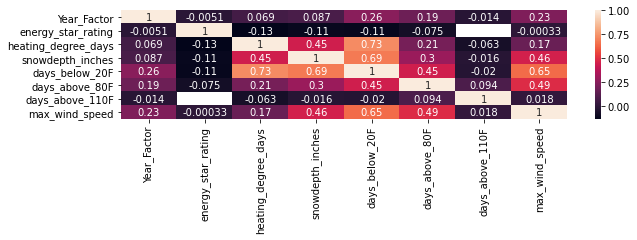

In [21]:
from matplotlib import pyplot as plt
def show_heat_map(df,cols, width=5, height=5):
    width=width
    height=height
    df=df
    cols=cols
    plt.figure(figsize=(width,height))
    sns.heatmap(df[cols].corr(), annot=True)
    plt.show()
cols =['Year_Factor','energy_star_rating','heating_degree_days','snowdepth_inches','days_below_20F','days_above_80F','days_above_110F','max_wind_speed']
show_heat_map(df,cols,10,2)

This shows correlation between the mentioned features.
We can see that days_below_20F is related to heating_degree_days and snowdepth_inches.

In [22]:
group_by_year = df.groupby(['facility_type'])
group_by_year.size()

facility_type
2to4_Unit_Building                            1893
5plus_Unit_Building                           1273
Commercial_Other                              1744
Commercial_Unknown                              95
Data_Center                                     27
Education_College_or_university               1056
Education_Other_classroom                     3860
Education_Preschool_or_daycare                 108
Education_Uncategorized                        709
Food_Sales                                      70
Food_Service_Other                              17
Food_Service_Restaurant_or_cafeteria            64
Food_Service_Uncategorized                      18
Grocery_store_or_food_market                   448
Health_Care_Inpatient                          409
Health_Care_Outpatient_Clinic                   56
Health_Care_Outpatient_Uncategorized            36
Health_Care_Uncategorized                       51
Industrial                                     384
Laboratory       

In [23]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['State_Factor', 'building_class', 'facility_type']


In [24]:
#Converting categorical values to binary
d = {'Commercial': 1, 'Residential': 0}
df['building_class'] = df['building_class'].map(d)

In [25]:
group_by_year = df.groupby(['building_class'])
group_by_year.size()

building_class
0    43558
1    32199
dtype: int64

In [26]:
df.describe()

,Year_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,0.425030,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,0.494351,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,0.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,0.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,0.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,1.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [27]:
group_by_ = df.groupby(['building_class','State_Factor'])
group_by_.size()

building_class  State_Factor
0               State_1           268
                State_11         3416
                State_2          1802
                State_4          1666
                State_6         36021
                State_8           385
1               State_1          5350
                State_10           15
                State_11         2996
                State_2          3069
                State_4          2634
                State_6         14819
                State_8          3316
dtype: int64

In [28]:
group_by_ = df.groupby(['building_class','year_built'])
group_by_.size()

building_class  year_built
0               1649.0          4
                1800.0          2
                1815.0          1
                1827.0          4
                1836.0          4
                             ... 
1               2011.0        114
                2012.0        157
                2013.0        185
                2014.0         97
                2015.0         43
Length: 325, dtype: int64

In [29]:
df['year_built'].isnull().sum()

1837

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

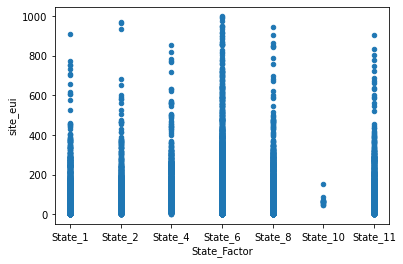

In [30]:
df.plot.scatter(x="State_Factor", y="site_eui")

array([[<AxesSubplot:title={'center':'days_below_20F'}>]], dtype=object)

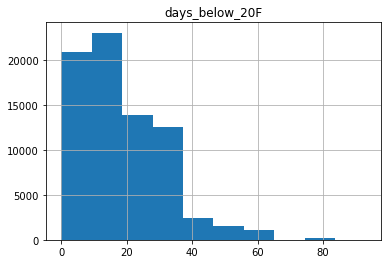

In [31]:
df[["days_below_20F"]].hist()

So,most of the places have around 15-20days below 20F

In [32]:
group_by_ = df.groupby(['days_below_0F'])
group_by_.size()

days_below_0F
0     57405
1     13131
2         2
3         2
4        20
5         1
6      2122
7       250
8       844
12      290
15     1076
17       99
19      191
20       95
21      186
22        2
25       15
29        1
31       25
dtype: int64